<a href="https://colab.research.google.com/github/YusufAbdurrahmann/laptop-price-regression/blob/main/laptop_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# **Data Import**

In [9]:
df = pd.read_csv("sample_data/laptop_price.csv", encoding="windows-1252")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Data Undertsanding**

In [10]:
df.shape

(1303, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# **Data Cleaning**

In [12]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [13]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

<ipython-input-26-f49559c87bb6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_euros"], color = "skyblue")


<Axes: xlabel='Price_euros', ylabel='Density'>

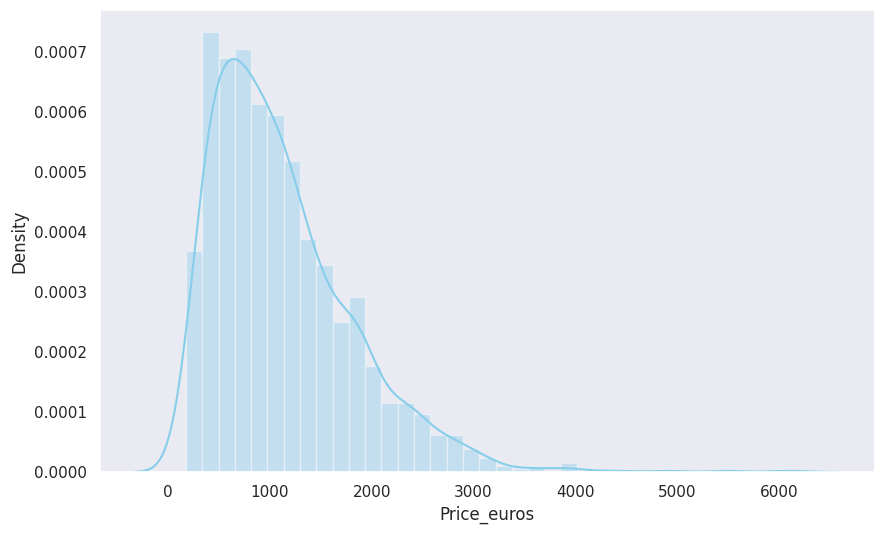

In [26]:
plt.figure(figsize = (10,6))
sns.set_theme(style = "dark")
sns.distplot(df["Price_euros"], color = "skyblue")

<ipython-input-28-284129184d7d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = "TypeName", palette = "pastel")


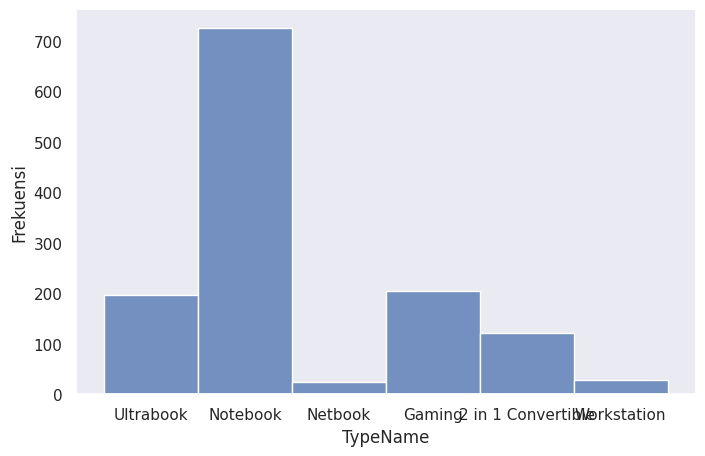

In [28]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = "TypeName", palette = "pastel")
plt.ylabel("Frekuensi")
plt.show()

# **Data Preperation**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [37]:
cp = LabelEncoder()
pr = LabelEncoder()
tn = LabelEncoder()
sr = LabelEncoder()
cu = LabelEncoder()
rm = LabelEncoder()
mr = LabelEncoder()
gp = LabelEncoder()
os = LabelEncoder()
wt = LabelEncoder()

df["Company"] = cp.fit_transform(df["Company"])
df["Product"] = pr.fit_transform(df["Product"])
df["TypeName"] = tn.fit_transform(df["TypeName"])
df["ScreenResolution"] = sr.fit_transform(df["ScreenResolution"])
df["Cpu"] = cu.fit_transform(df["Cpu"])
df["Ram"] = rm.fit_transform(df["Ram"])
df["Memory"] = mr.fit_transform(df["Memory"])
df["Gpu"] = gp.fit_transform(df["Gpu"])
df["OpSys"] = os.fit_transform(df["OpSys"])
df["Weight"] = wt.fit_transform(df["Weight"])

In [40]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [39]:
X = df.drop(columns = ["Price_euros"])
y = df["Price_euros"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modelling**

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)

print(score)

0.40228722021021646
